# KNN

### Data information

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [240]:
data = pd.read_csv('BD Titanic Completa.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,NaN
5,6,0,3,"Moran, Mr. James",male,0.0,0,330877,8.4583,Q,NaN,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,NaN


In [241]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,23.974538,0.450726
std,378.020061,0.484918,0.837836,17.471656,0.925378
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,8.000000,0.000000
50%,655.000000,0.000000,3.000000,24.000000,0.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,9.000000


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   object 
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   object 
 10  Cabin        1068 non-null   object 
 11  Embarked     270 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 122.8+ KB


In [243]:
data_copy = data
columns = data_copy.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [244]:
data_copy.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           241
Embarked       1039
dtype: int64

### Preprocessing

In [245]:
### Transfer the Embarked values from the Cabin column to the Embarked column 
y_preprocessing_embarked = data_copy['Embarked']
y_helper = data_copy['Cabin']

for i in range(0, len(y_helper)-1):
    data_temp = str(y_helper[i])
    if len(data_temp) == 1 and data_temp == 'S' or data_temp == 'Q' or data_temp == 'C':
        y_preprocessing_embarked[i] = y_helper[i]
        y_helper[i] = np.nan

data_copy['Embarked'] = y_preprocessing_embarked
data_copy['Cabin'] = y_helper

### Transfer the Embarked values from the Fare column to the Embarked column
y_helper = data_copy['Fare']
for i in range(0, len(y_helper)):
    data_temp = str(y_helper[i])
    if len(data_temp) == 1 and data_temp == 'S' or data_temp == 'Q' or data_temp == 'C':
        y_preprocessing_embarked[i] = y_helper[i]
        y_helper[i] = np.nan
        
data_copy['Embarked'] = y_preprocessing_embarked
data_copy['Fare'] = y_helper

data_copy

/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_3798/2831600055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_preprocessing_embarked[i] = y_helper[i]
/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_3798/2831600055.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_helper[i] = np.nan
/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_3798/2831600055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,A.5. 3236,8.05,NaN,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,359309,8.05,NaN,NaN,S


In [246]:
data_copy.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare            241
Cabin          1037
Embarked          2
dtype: int64

In [247]:
data_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,A.5. 3236,8.05,NaN,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,359309,8.05,NaN,NaN,S


### Data Visualization to find relations

<Axes: title={'center': 'Sobrevivientes según su sexo'}, xlabel='Survived', ylabel='count'>

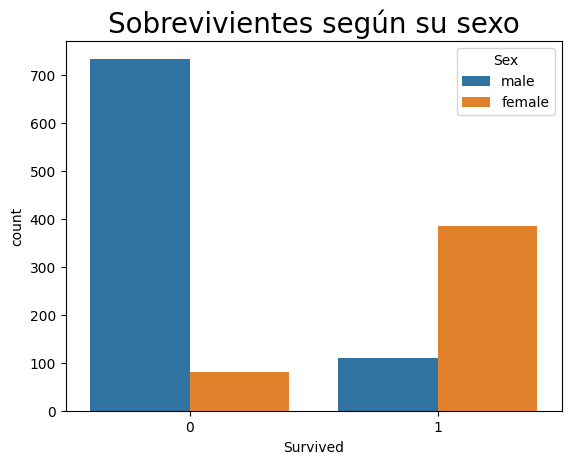

In [248]:
plt.title('Sobrevivientes según su sexo', size=20, y=1)
sns.countplot(x = 'Survived', hue='Sex', data=data_copy)

<Axes: title={'center': 'Sobrevivientes según su clase'}, xlabel='Survived', ylabel='count'>

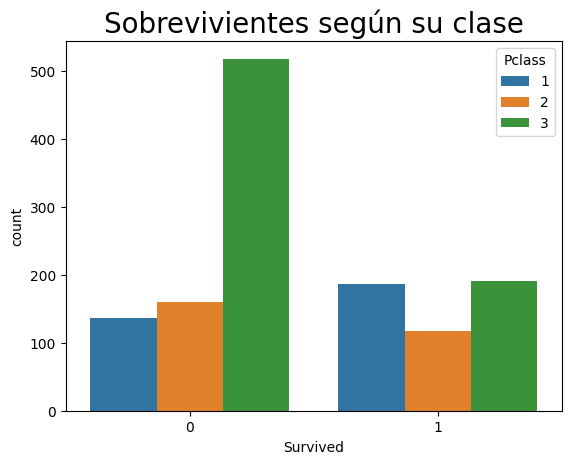

In [249]:
plt.title('Sobrevivientes según su clase', size=20, y=1)
sns.countplot(x = 'Survived', hue='Pclass', data=data_copy)

<Axes: title={'center': 'Sobrevivientes según donde embarcaron'}, xlabel='Survived', ylabel='count'>

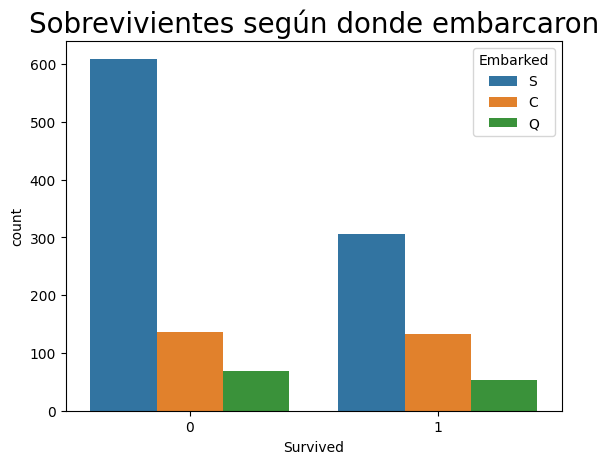

In [250]:
plt.title('Sobrevivientes según donde embarcaron', size=20, y=1)
sns.countplot(x = 'Survived', hue='Embarked', data=data_copy)

<Axes: title={'center': 'Sobrevivientes según número de parientes'}, xlabel='Survived', ylabel='count'>

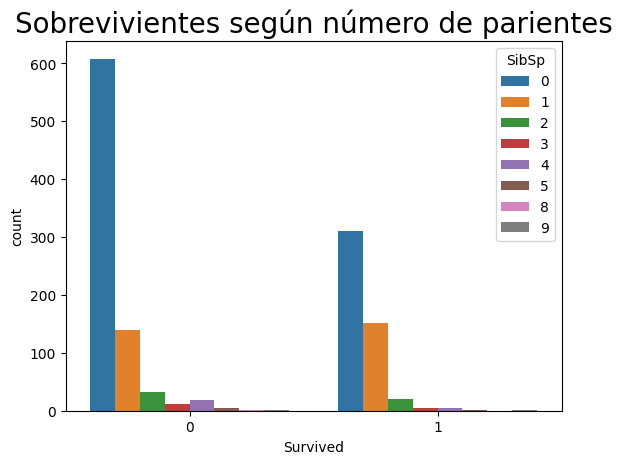

In [251]:
plt.title('Sobrevivientes según número de parientes', size=20, y=1)
sns.countplot(x = 'Survived', hue='SibSp', data=data_copy)

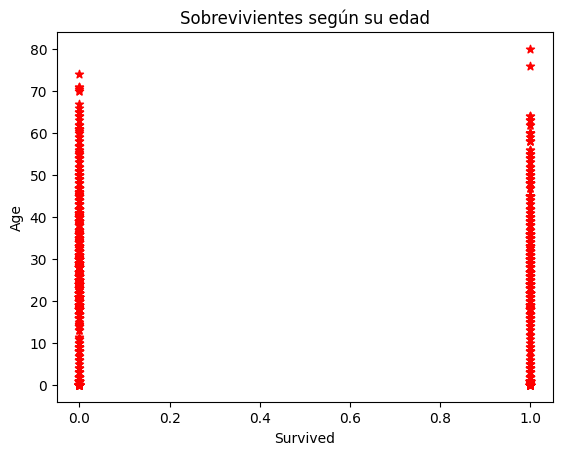

In [252]:
plt.scatter(data_copy['Survived'], data_copy['Age'], marker='*', color="red")
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Sobrevivientes según su edad')
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

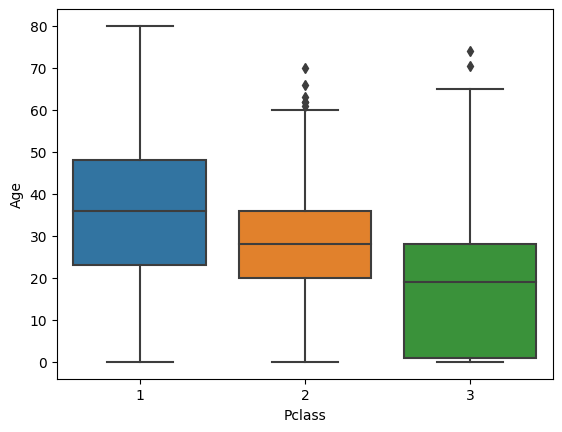

In [253]:
sns.boxplot(x='Pclass', y='Age',data=data_copy)

<Axes: title={'center': 'Sobrevivientes según número de parientes'}, xlabel='Age', ylabel='count'>

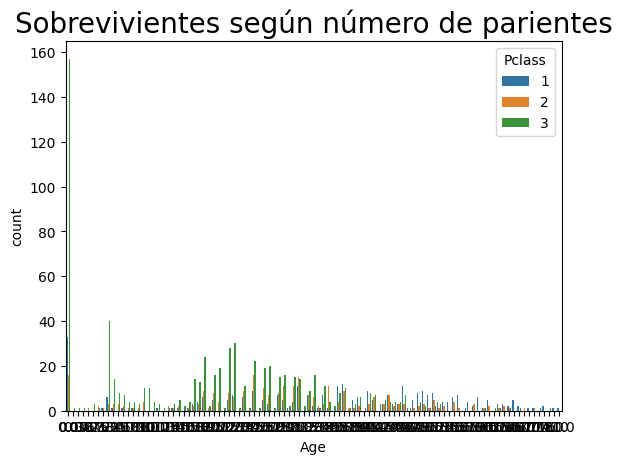

In [254]:
plt.title('Sobrevivientes según número de parientes', size=20, y=1)
sns.countplot(x = 'Age', hue='Pclass', data=data_copy)

<Axes: xlabel='Survived', ylabel='Age'>

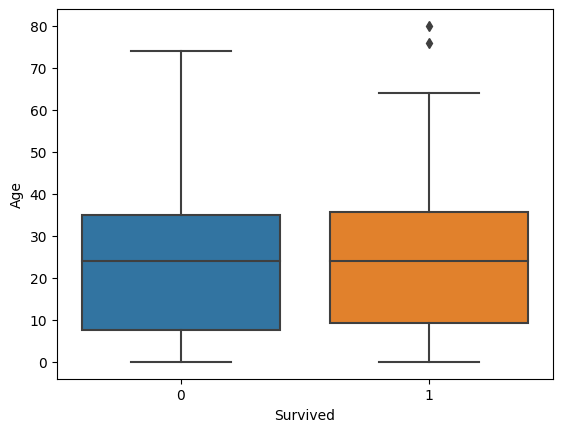

In [255]:
sns.boxplot(x='Survived',y='Age',data=data_copy)

### Preparing data

In [256]:
colnames = ['Survived']
Y = data_copy[colnames].copy()
Y['Survived'] = Y['Survived'].astype(float)
Y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,0.0
1305,1.0
1306,0.0
1307,0.0


In [257]:
colnames = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'Survived']
X = data_copy[colnames].copy()
X

,PassengerId,Pclass,Sex,Age,SibSp,Embarked,Survived
0,1,3,male,22.0,1,S,0
1,2,1,female,38.0,1,C,1
2,3,3,female,26.0,0,S,1
3,4,1,female,35.0,1,S,1
4,5,3,male,35.0,0,S,0
...,...,...,...,...,...,...,...
1304,1305,3,male,0.0,0,S,0
1305,1306,1,female,39.0,0,C,1
1306,1307,3,male,38.5,0,S,0
1307,1308,3,male,0.0,0,S,0


In [258]:
embarked = X['Embarked']
for i in range(len(embarked)):
    if embarked[i] == 'S':
        embarked[i] = 0
    elif embarked[i] == 'C':
        embarked[i] = 1
    else:
        embarked[i] = 2
 
X['Embarked'] = embarked

X['Sex'] = X['Sex'].apply(lambda x : 1 if x == 'female' else 0)

X['Pclass'] = X['Pclass'].astype(float)
X['Sex'] = X['Sex'].astype(float)
X['SibSp'] = X['SibSp'].astype(float)
X['Embarked'] = X['Embarked'].astype(float)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   float64
 2   Sex          1309 non-null   float64
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   float64
 5   Embarked     1309 non-null   float64
 6   Survived     1309 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 71.7 KB


/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_3798/2889237335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embarked[i] = 0
/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_3798/2889237335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embarked[i] = 1
/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_3798/2889237335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embarked[i] = 0
/var/folde

In [259]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Embarked,Survived
0,1,3.0,0.0,22.0,1.0,0.0,0
1,2,1.0,1.0,38.0,1.0,1.0,1
2,3,3.0,1.0,26.0,0.0,0.0,1
3,4,1.0,1.0,35.0,1.0,0.0,1
4,5,3.0,0.0,35.0,0.0,0.0,0
...,...,...,...,...,...,...,...
1304,1305,3.0,0.0,0.0,0.0,0.0,0
1305,1306,1.0,1.0,39.0,0.0,1.0,1
1306,1307,3.0,0.0,38.5,0.0,0.0,0
1307,1308,3.0,0.0,0.0,0.0,0.0,0


In [260]:
sobrevivientes = X[X['Survived'] == 1]
no_sobrevivientes = X[X['Survived'] == 0]

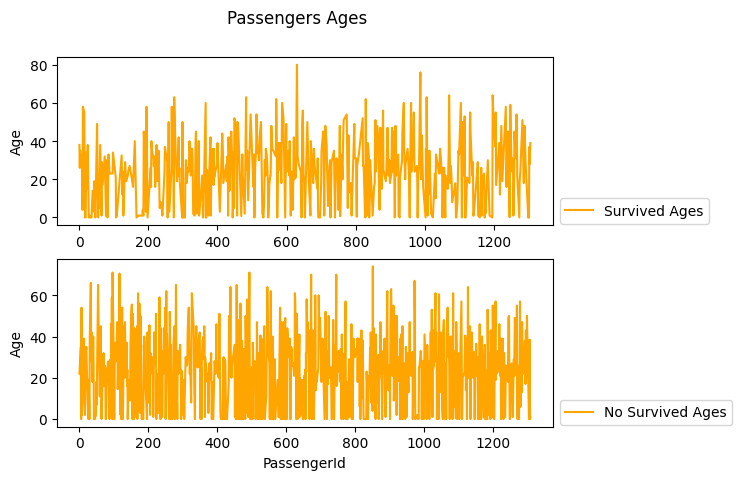

In [261]:
fig, ax = plt.subplots(2)
fig.suptitle('Passengers Ages')

ax[0].plot(sobrevivientes['Age'], color="orange",  label='Survived Ages')
ax[0].set(ylabel='Age')
ax[0].legend(bbox_to_anchor=(1, 0.2))

ax[1].plot(no_sobrevivientes['Age'], color="orange",  label='No Survived Ages')
ax[1].set(xlabel='PassengerId', ylabel='Age')
ax[1].legend(bbox_to_anchor=(1, 0.2))


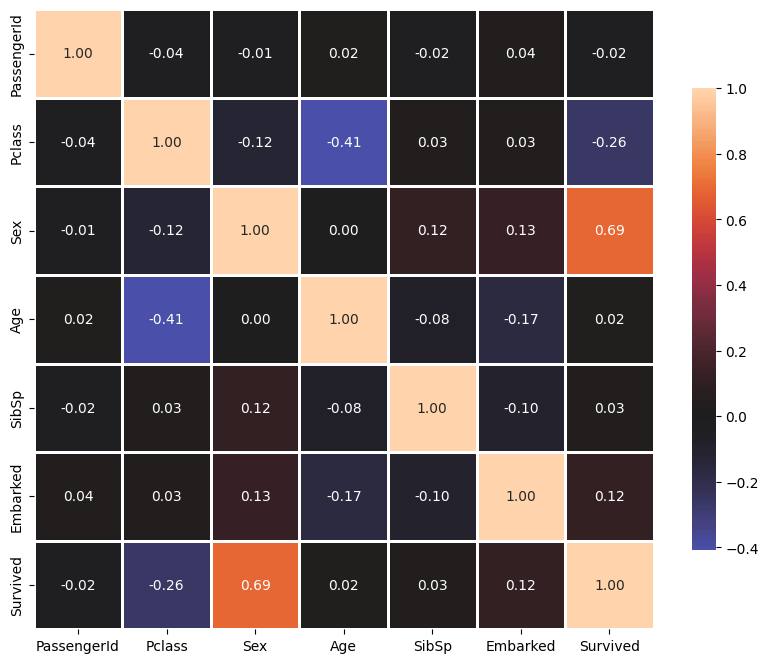

In [262]:
def mapa_de_calor_correlacion(data):
    correlaciones = data[colnames].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();

mapa_de_calor_correlacion(X)

## KNN algortihm

In [263]:
X = X.drop('Survived', axis=1)
X

,PassengerId,Pclass,Sex,Age,SibSp,Embarked
0,1,3.0,0.0,22.0,1.0,0.0
1,2,1.0,1.0,38.0,1.0,1.0
2,3,3.0,1.0,26.0,0.0,0.0
3,4,1.0,1.0,35.0,1.0,0.0
4,5,3.0,0.0,35.0,0.0,0.0
...,...,...,...,...,...,...
1304,1305,3.0,0.0,0.0,0.0,0.0
1305,1306,1.0,1.0,39.0,0.0,1.0
1306,1307,3.0,0.0,38.5,0.0,0.0
1307,1308,3.0,0.0,0.0,0.0,0.0


In [264]:
Y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,0.0
1305,1.0
1306,0.0
1307,0.0


In [265]:
def calculate_distances(data, x):    
    distances = np.linalg.norm(data - x, axis=1)
    return distances

In [266]:
def calculate_accuracy(new_labels, Y):
    error_test, accuracy = 0, 0
    for i in range(len(Y)):
        if new_labels[i] == Y['Survived'].loc[Y.index[i]]:
            accuracy += 1
        else:
            error_test +=1 
            
    error_test = error_test/len(Y)     
    accuracy = accuracy/len(Y)
    return  error_test, accuracy

In [267]:
point = []
data =[]
neighbor = 0
votes = [] 
label = 0
distances = []
nn_ids =[]

In [268]:
def knn(X, Y, k):
    new_labels = []  
    # Selecting point 
    for i in range(len(X)):
        #Calculating distance
        point = X.iloc[i]
        point = np.array(point)
        data = X.values 
        
        distances = calculate_distances(data, point)
        
        #Sorting the distances
        distances = pd.DataFrame(distances)
        distances = distances.sort_values(by=0)
        distances['Id'] = X['PassengerId']
        
        ##Selecting the nearest neighbors
        nn_ids = distances.iloc[:k]
        nn_ids = nn_ids.drop(0, axis=1)
        #Getting the label
        neighbor, label, votes = 0, 0, []
        
        for i in range(len(nn_ids)):
            neighbor = nn_ids['Id'].loc[nn_ids.index[i]] - 1
            label = Y['Survived'].loc[Y.index[neighbor]]
            votes.append(label)
        
        new_labels.append(statistics.mode(votes))
    
    error_test, accuracy = calculate_accuracy(new_labels, Y)   
    return accuracy, error_test


In [269]:
error_manual, new_labels = [], []

for k in range(2,30):
    accuracy, error_test = knn(X, Y, k)
    print('Accuracy con ', k , ' vecinos: ', accuracy)
    print('Error con ', k , ' vecinos: ', error_test)
    error_manual.append(accuracy)

Accuracy con  2  vecinos:  1.0
Error con  2  vecinos:  0.0
Accuracy con  3  vecinos:  0.7608861726508785
Error con  3  vecinos:  0.23911382734912145
Accuracy con  4  vecinos:  0.8678380443086325
Error con  4  vecinos:  0.13216195569136746
Accuracy con  5  vecinos:  0.6799083269671505
Error con  5  vecinos:  0.3200916730328495
Accuracy con  6  vecinos:  0.8013750954927426
Error con  6  vecinos:  0.19862490450725745
Accuracy con  7  vecinos:  0.6676852559205501
Error con  7  vecinos:  0.33231474407944994
Accuracy con  8  vecinos:  0.7486631016042781
Error con  8  vecinos:  0.25133689839572193
Accuracy con  9  vecinos:  0.6508785332314744
Error con  9  vecinos:  0.34912146676852557
Accuracy con  10  vecinos:  0.7310924369747899
Error con  10  vecinos:  0.2689075630252101
Accuracy con  11  vecinos:  0.6409472880061116
Error con  11  vecinos:  0.35905271199388844
Accuracy con  12  vecinos:  0.7173414820473644
Error con  12  vecinos:  0.2826585179526356
Accuracy con  13  vecinos:  0.63712757

### Evaluado al modelo

Text(0, 0.5, 'Accuracy')

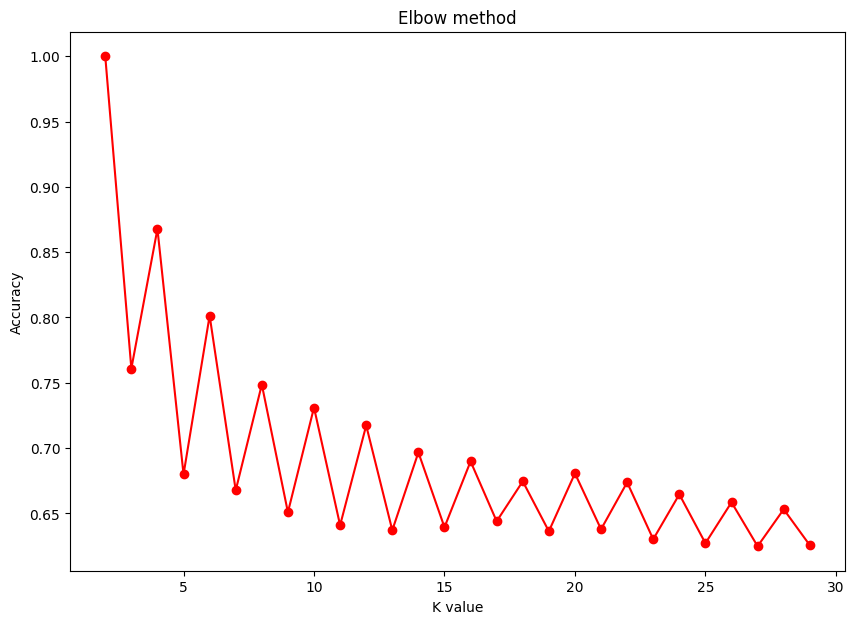

In [270]:
plt.figure(figsize=(10,7))
plt.plot(range(2,30), error_manual, color='red', marker='o')
plt.title('Elbow method')
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [271]:
new_labels = []
k = 4
accuracy, error_test = knn(X, Y, k)
print('Accuracy con ', k , ' vecinos: ', accuracy)
print('Error con ', k , ' vecinos: ', error_test)

Accuracy con  4  vecinos:  0.8678380443086325
Error con  4  vecinos:  0.13216195569136746


## KNN with SKlearn

In [272]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [273]:
X_test, X_train, y_test, y_train = train_test_split(X, Y, test_size=0.80, random_state=42)
print(len(X_test))
print(len(X_train))

261
1048


In [280]:
error = []

for  i in range(2,50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_squared_error(y_test, y_pred)
    error.append(mae)    

/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1

Text(0, 0.5, 'Mean Square Error')

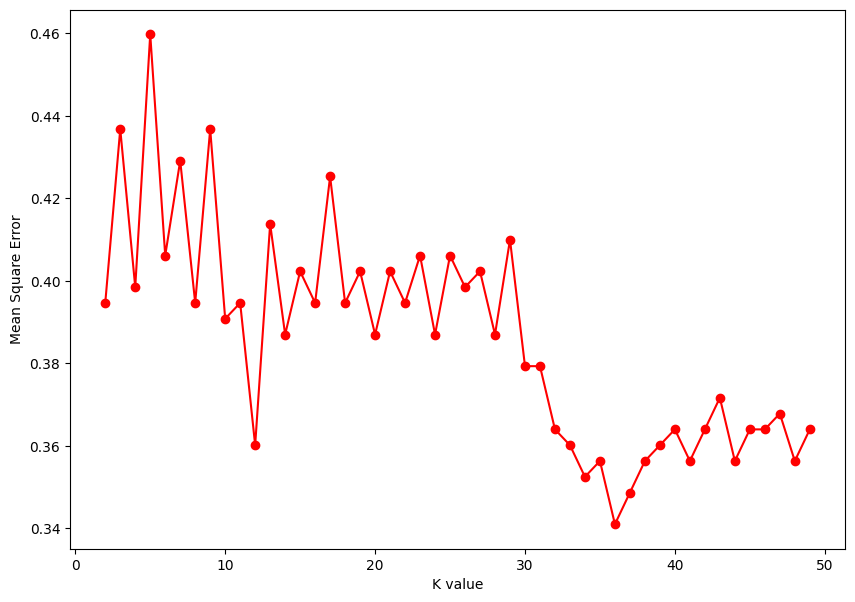

In [281]:
plt.figure(figsize=(10,7))
plt.plot(range(2,50), error, color='red', marker='o')
plt.xlabel('K value')
plt.ylabel('Mean Square Error')

In [289]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
mae 

/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.36015325670498083